# barplot을 이용한 막대 그래프 그리기

In [8]:
! pip install matplotlib -U
! sudo apt-get install -y fonts-nanum
! sudo fc-cache -fv
! rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,154 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open std

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import pandas as pd

영화 관람자 수 데이터를 막대 그래프로 나타내기

In [2]:
movie_title = ['크루엘라', '극장판 귀멸의 칼날: 무한열차편', '학교 가는 길']
audience = [664308, 2099131, 20067]

data = {'영화제목': movie_title, '누적관객': audience}
df = pd.DataFrame(data)

In [3]:
df

,영화제목,누적관객
0,크루엘라,664308
1,극장판 귀멸의 칼날: 무한열차편,2099131
2,학교 가는 길,20067


<Axes: xlabel='영화제목', ylabel='누적관객'>

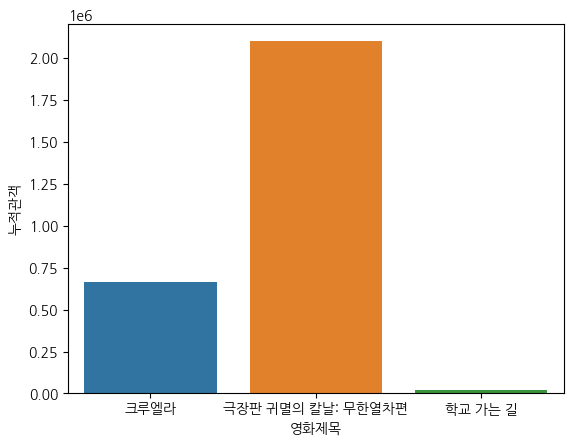

In [4]:
sns.barplot(data=df, x='영화제목', y='누적관객')

차트 크기 변경

In [5]:
sns.set(rc={'figure.figsize': (10, 5)})

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='영화제목', ylabel='누적관객'>

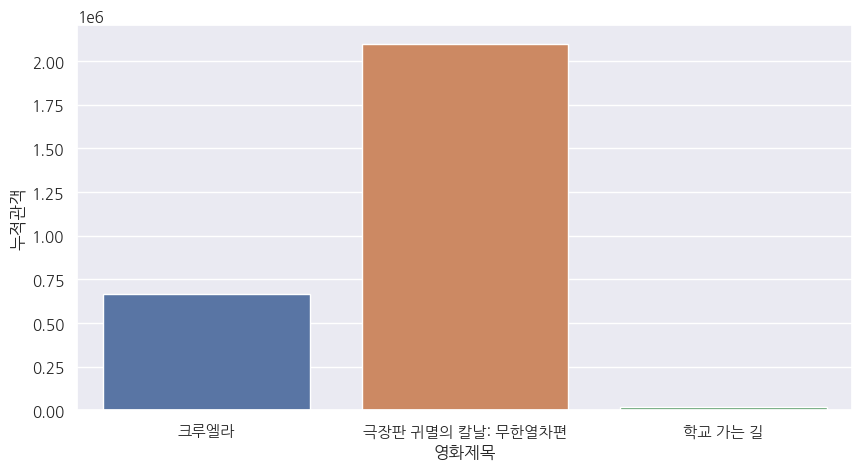

In [7]:
sns.barplot(data=df, x='영화제목', y='누적관객')

누적 관객수 별로 그리기

<Axes: xlabel='영화제목', ylabel='누적관객'>

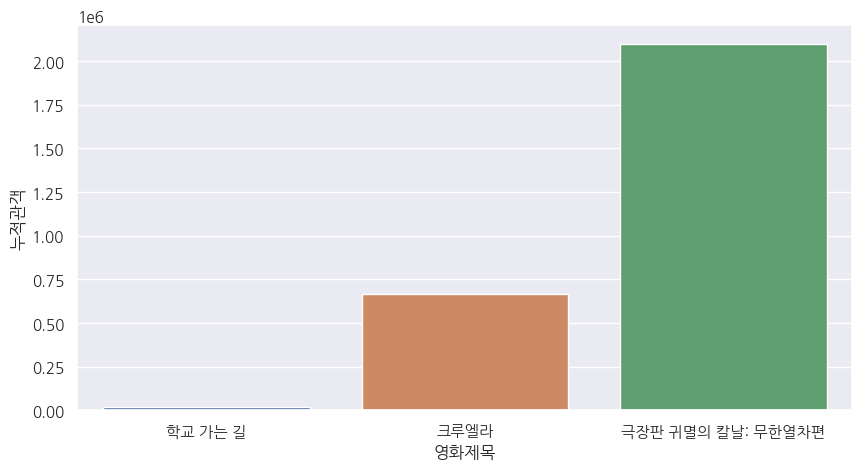

In [8]:
sns.barplot(data=df, x='영화제목', y='누적관객', order=df.sort_values('누적관객').영화제목)

ascending을 이용한 내림차순 정렬

<Axes: xlabel='영화제목', ylabel='누적관객'>

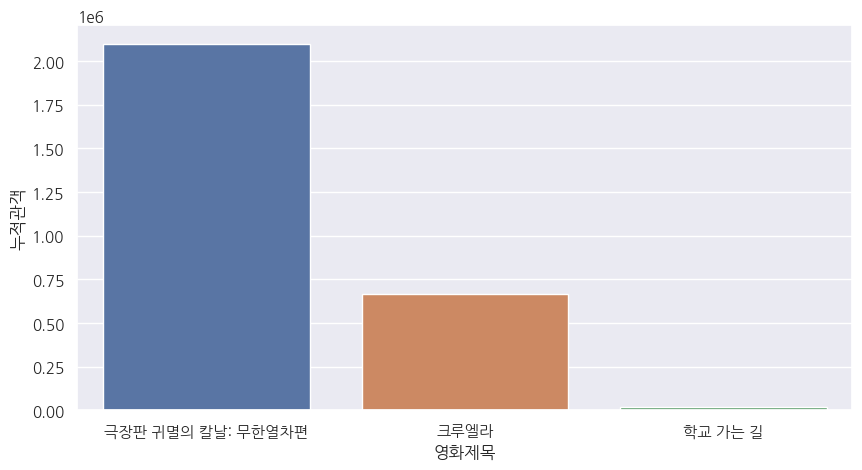

In [9]:
sns.barplot(data=df, x='영화제목', y='누적관객', order=df.sort_values('누적관객', ascending=False).영화제목)

In [10]:
df.sort_values('누적관객', ascending=False)

,영화제목,누적관객
1,극장판 귀멸의 칼날: 무한열차편,2099131
0,크루엘라,664308
2,학교 가는 길,20067


In [11]:
df.sort_values('누적관객', ascending=False).영화제목
df.sort_values('누적관객', ascending=False)['영화제목'] # 동일

1    극장판 귀멸의 칼날: 무한열차편
0                 크루엘라
2              학교 가는 길
Name: 영화제목, dtype: object

관객 수 포맷 변환

<ipython-input-12-28ae0d6c8261>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(ylabels)


[Text(0, 0.0, '0만 명'),
 Text(0, 250000.0, '25만 명'),
 Text(0, 500000.0, '50만 명'),
 Text(0, 750000.0, '75만 명'),
 Text(0, 1000000.0, '100만 명'),
 Text(0, 1250000.0, '125만 명'),
 Text(0, 1500000.0, '150만 명'),
 Text(0, 1750000.0, '175만 명'),
 Text(0, 2000000.0, '200만 명'),
 Text(0, 2250000.0, '225만 명')]

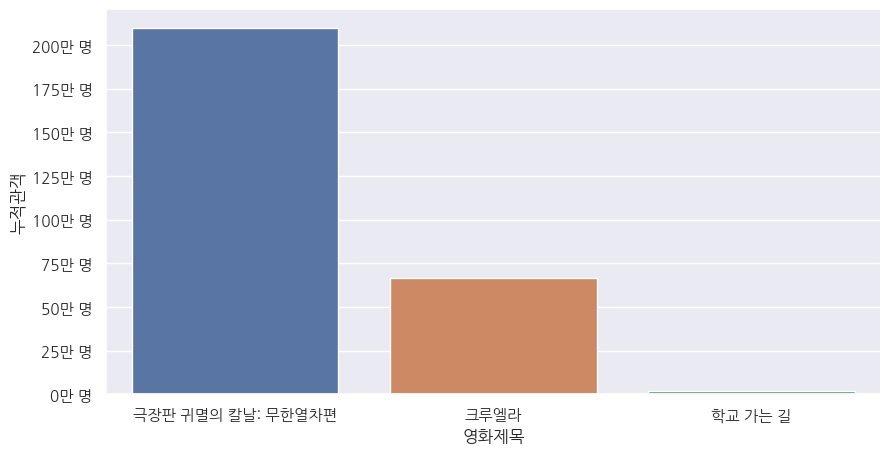

In [12]:
chart = sns.barplot(data=df, x='영화제목', y='누적관객', order=df.sort_values('누적관객', ascending=False).영화제목)
ylabels = ['{:,.0f}'.format(i) + '만 명' for i in chart.get_yticks() / 10000]
chart.set_yticklabels(ylabels)

경고문 없애기

[Text(0, 0.0, '0만 명'),
 Text(0, 250000.0, '25만 명'),
 Text(0, 500000.0, '50만 명'),
 Text(0, 750000.0, '75만 명'),
 Text(0, 1000000.0, '100만 명'),
 Text(0, 1250000.0, '125만 명'),
 Text(0, 1500000.0, '150만 명'),
 Text(0, 1750000.0, '175만 명'),
 Text(0, 2000000.0, '200만 명'),
 Text(0, 2250000.0, '225만 명')]

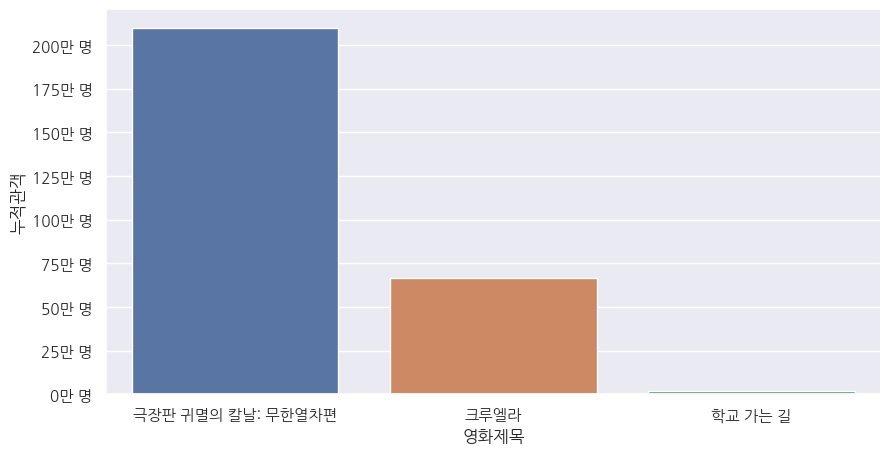

In [14]:
import matplotlib.ticker as mticker

chart = sns.barplot(data=df, x='영화제목', y='누적관객', order=df.sort_values('누적관객', ascending=False).영화제목)
ticks_labels = chart.get_yticks().tolist()
chart.yaxis.set_major_locator(mticker.FixedLocator(ticks_labels))
ylabels = ['{:,.0f}'.format(i) + '만 명' for i in chart.get_yticks() / 10000]
chart.set_yticklabels(ylabels)

가로로 그리기

<ipython-input-16-593a561fce20>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(x_labels)


[Text(0.0, 0, '0만 명'),
 Text(250000.0, 0, '25만 명'),
 Text(500000.0, 0, '50만 명'),
 Text(750000.0, 0, '75만 명'),
 Text(1000000.0, 0, '100만 명'),
 Text(1250000.0, 0, '125만 명'),
 Text(1500000.0, 0, '150만 명'),
 Text(1750000.0, 0, '175만 명'),
 Text(2000000.0, 0, '200만 명'),
 Text(2250000.0, 0, '225만 명')]

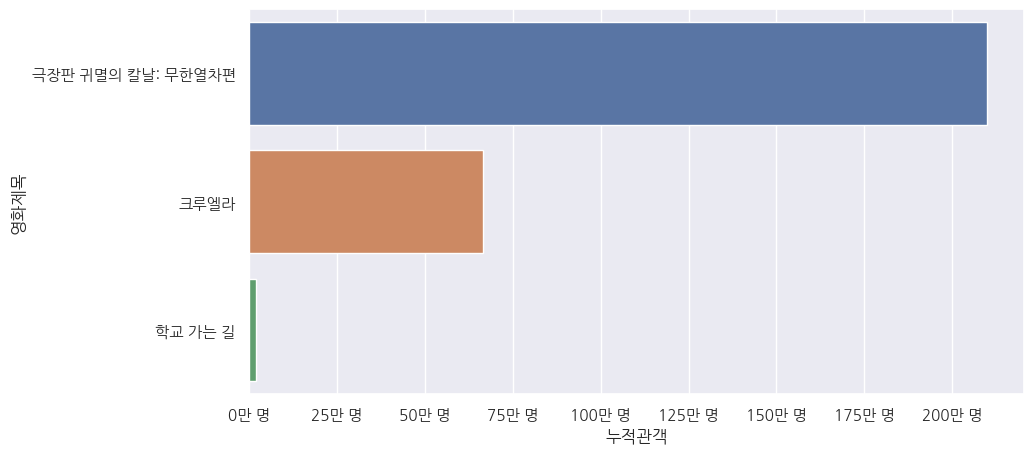

In [16]:
chart = sns.barplot(data=df, x='누적관객', y='영화제목', order=df.sort_values('누적관객', ascending=False).영화제목)
x_labels = ['{:,.0f}'.format(i) + '만 명' for i in chart.get_xticks() / 10000]
chart.set_xticklabels(x_labels)

차트 색상 변경

<ipython-input-17-510d1e9f26da>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(x_labels)


[Text(0.0, 0, '0만 명'),
 Text(250000.0, 0, '25만 명'),
 Text(500000.0, 0, '50만 명'),
 Text(750000.0, 0, '75만 명'),
 Text(1000000.0, 0, '100만 명'),
 Text(1250000.0, 0, '125만 명'),
 Text(1500000.0, 0, '150만 명'),
 Text(1750000.0, 0, '175만 명'),
 Text(2000000.0, 0, '200만 명'),
 Text(2250000.0, 0, '225만 명')]

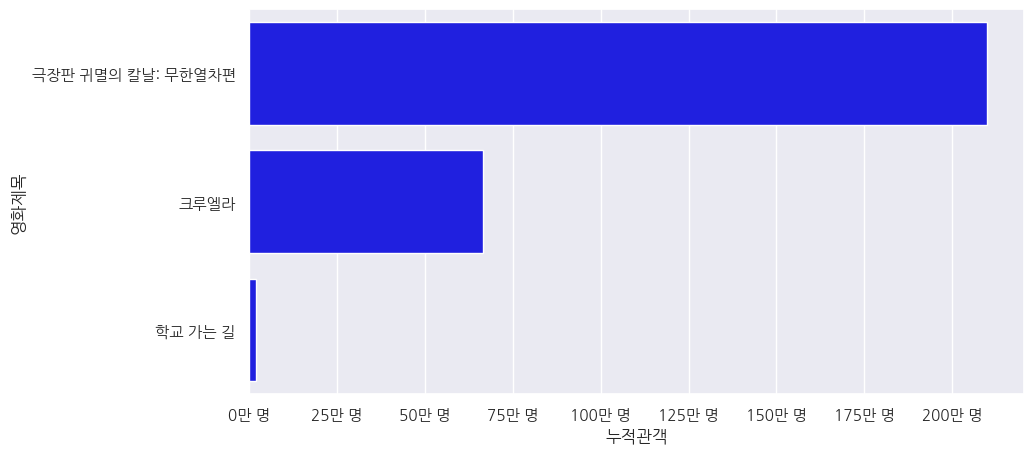

In [17]:
chart = sns.barplot(data=df, x='누적관객', y='영화제목', order=df.sort_values('누적관객', ascending=False).영화제목, color='blue')
x_labels = ['{:,.0f}'.format(i) + '만 명' for i in chart.get_xticks() / 10000]
chart.set_xticklabels(x_labels)

제목 추가, 폰트 사이즈 변경

<ipython-input-18-a8424131ab58>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(x_labels)


Text(0.5, 1.0, '영화별 누적 관객 수')

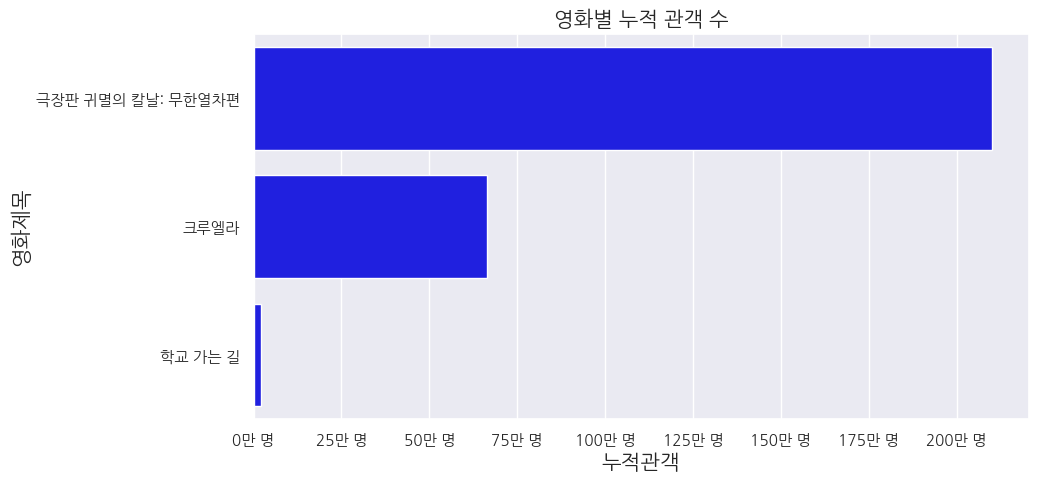

In [18]:
chart = sns.barplot(data=df, x='누적관객', y='영화제목', order=df.sort_values('누적관객', ascending=False).영화제목, color='blue')
x_labels = ['{:,.0f}'.format(i) + '만 명' for i in chart.get_xticks() / 10000]
chart.set_xticklabels(x_labels)

plt.xlabel('누적관객', fontsize=15)
plt.ylabel('영화제목', fontsize=15)
plt.title('영화별 누적 관객 수', fontsize=15)